### 1. Set-up

In [47]:
clear all
set maxvar 32767
set more off

### 2. Install Package

In [48]:
ssc install coefplot, replace

checking coefplot consistency and verifying not already installed...
all files already exist and are up to date.


### 3. Upload Data (.dta)

In [49]:
use "https://raw.githubusercontent.com/worldbank/Stata-IE-Visual-Library/develop/Library/Regression%20coefficients/Plot%20of%20interaction%20terms%20with%20varying%20CIs%20(coefplot%20from%20matrices)/data.dta", clear 

### 4. Run the regression and store the results in each matrix for T and C

In [50]:
tempname reg_result ci_table
cap matrix drop T C

reg w95_total_val_harvested ///
treatment_hh#gender_hhh#year treatment_hh##year

matrix `reg_result' = r(table)
matrix list `reg_result'

foreach group in T C {

if "`group'" == "T" local col_range = "16..20"
else local col_range = "6..10"

matrix `group' = `reg_result'[1, `col_range'] \ `reg_result'[5, `col_range'] \ `reg_result'[6, `col_range']
matrix `group' = `group''
matrix rownames `group' = 2012 2013 2014 2016 2017		
matrix colnames `group' = B l_95 u_95
}





      Source |       SS           df       MS      Number of obs   =     2,788
-------------+----------------------------------   F(19, 2768)     =      7.18
       Model |  1.1146e+12        19  5.8665e+10   Prob > F        =    0.0000
    Residual |  2.2624e+13     2,768  8.1736e+09   R-squared       =    0.0470
-------------+----------------------------------   Adj R-squared   =    0.0404
       Total |  2.3739e+13     2,787  8.5178e+09   Root MSE        =     90408

----------------------------------------------------------------------------------------------
     w95_total_val_harvested |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-----------------------------+----------------------------------------------------------------
treatment_hh#gender_hhh#year |
      Control#Male HHH#2012  |   3932.735   11803.49     0.33   0.739     -19211.8    27077.27
      Control#Male HHH#2013  |    16675.2   12458.46     1.34   0.181    -7753.614    41104.02
      Control#M

### 5. Get 99 and 90 CIs and add to the Treatment and Control matrices

In [51]:
foreach level in 99 90 {

reg, level(`level')
matrix `ci_table' = r(table)		

foreach group in t c {

if "`group'" == "t" local col_range = "16..20"
else local col_range = "6..10"

matrix `group'_ci`level' = `ci_table'[5, `col_range'] \ `ci_table'[6, `col_range']
matrix `group'_ci`level' = `group'_ci`level''
matrix rownames `group'_ci`level' = 2012 2013 2014 2016 2017		
matrix colnames `group'_ci`level' = l_`level' u_`level'						
}
}
matrix T = T, t_ci99, t_ci90
matrix C = C, c_ci99, c_ci90



      Source |       SS           df       MS      Number of obs   =     2,788
-------------+----------------------------------   F(19, 2768)     =      7.18
       Model |  1.1146e+12        19  5.8665e+10   Prob > F        =    0.0000
    Residual |  2.2624e+13     2,768  8.1736e+09   R-squared       =    0.0470
-------------+----------------------------------   Adj R-squared   =    0.0404
       Total |  2.3739e+13     2,787  8.5178e+09   Root MSE        =     90408

----------------------------------------------------------------------------------------------
     w95_total_val_harvested |      Coef.   Std. Err.      t    P>|t|     [99% Conf. Interval]
-----------------------------+----------------------------------------------------------------
treatment_hh#gender_hhh#year |
      Control#Male HHH#2012  |   3932.735   11803.49     0.33   0.739    -26492.02    34357.49
      Control#Male HHH#2013  |    16675.2   12458.46     1.34   0.181    -15437.81    48788.22
      Control#Mal

### 6. Sanity Check

In [52]:
matrix list T
matrix list C




T[5,7]
               B        l_95        u_95        l_99        u_99        l_90        u_90
2012   10404.981  -14055.059   34865.022  -21749.076   42559.038  -10120.425   30930.388
2013   24334.946  -1174.6428   49844.535     -9198.8   57868.693   2928.8213   45741.071
2014   29378.872   8523.0259   50234.717   1962.7249   56795.018    11877.89   46879.853
2016   17813.332  -6373.6742   42000.338  -13981.807   49608.471  -2482.9604   38109.624
2017   22109.132  -1568.3969   45786.662  -9016.2714   53234.536   2240.3626   41977.902


C[5,7]
               B        l_95        u_95        l_99        u_99        l_90        u_90
2012    3932.735  -19211.798   27077.268  -26492.016   34357.486  -15488.776   23354.246
2013   16675.203  -7753.6143   41104.021   -15437.81   48788.216  -3824.0028   37174.409
2014    20368.26  -218.98855   40955.509  -6694.8013   47431.322   3092.6695   37643.851
2016   19093.464  -3835.8695   42022.797  -11048.395   49235.323  -147.46455   38334.392
201

### 7. Graph point estimates and CIs by group

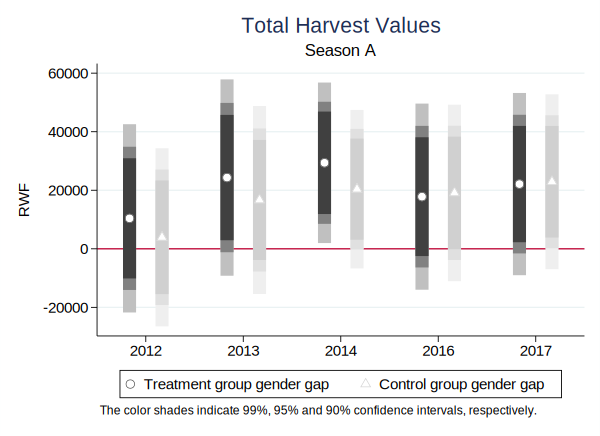

In [53]:
coefplot (matrix(T[,1]), ///
                ci( (T[,4] T[,5]) (T[,2] T[,3]) (T[,6] T[,7])  ) ///     
                mcolor(white) msize(medlarge) ///
                mlcolor(gs4) mlwidth(vthin) ///
                ciopts( lcolor(gs4*0.33 gs4*0.66 gs4) lwidth(3 ..) ) ) ///
             (matrix(C[,1]), ///
                ci( (C[,4] C[,5]) (C[,2] C[,3]) (C[,6] C[,7]) ) /// 
                msymbol(T) mcolor(white) msize(medlarge) ///
                mlcolor(gs13) mlwidth(vthin) ///
                ciopts( lcolor(gs13*0.33 gs13*0.66 gs13) lwidth(3 ..) ) ), ///
        vertical yline(0) grid(none) ///
        title("Total Harvest Values") ///
        subtitle("Season A") ///
        ytitle("RWF") ///
        ylabel(, angle(horizontal)) ///
        graphregion(color(white)) ///
        legend(order(4 "Treatment group gender gap" ///
                     8 "Control group gender gap") ///
               rows(1) cols(4))	///
        note("The color shades indicate 99%, 95% and 90% confidence intervals, respectively.")

### 8. Save the graph

In [44]:
 graph save "graph.png", replace

(file graph.png saved)
